In [1]:
import pandas as pd


In [4]:
s = pd.Series([10,20,30,40,50,60,70])
print(s)

0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int64


In [8]:
s = pd.Series([10,20,30,40,50,60,70], index = ["a","b","c","d","e","f","g"])
print(s)

a    10
b    20
c    30
d    40
e    50
f    60
g    70
dtype: int64


In [12]:
#Creating a dataframe
data = {
    "Name" : ["Alice", "Bob", "Charlie", "David"],
    "Age" : [25,30,35,40],
    "City" : ["New York", "Los Angeles", "Chicago", "Houston"]
}
df = pd.DataFrame(data)
print(df)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   40      Houston


In [17]:
#Reading and Writting data
df = pd.read_csv("../assets/employee_data.csv")
#display the first 5 rows
df.head()

,Age,Name,Salary,City
0,25,Alice,50000,New York
1,30,Bob,60000,Los Angeles
2,35,Charlie,70000,Chicago
3,40,David,80000,Houston
4,28,Eva,55000,San Francisco


In [18]:
#display last 5 rows 
df.tail()

,Age,Name,Salary,City
3,40,David,80000,Houston
4,28,Eva,55000,San Francisco
5,32,Frank,65000,Seattle
6,38,Grace,72000,Boston
7,45,Henry,85000,Miami


In [19]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     8 non-null      int64 
 1   Name    8 non-null      object
 2   Salary  8 non-null      int64 
 3   City    8 non-null      object
dtypes: int64(2), object(2)
memory usage: 384.0+ bytes


In [21]:
#descrptive statistics
df.describe()


,Age,Salary
count,8.000000,8.000000
mean,34.125000,67125.000000
std,6.664136,12028.982857
min,25.000000,50000.000000
25%,29.500000,58750.000000
50%,33.500000,67500.000000
75%,38.500000,74000.000000
max,45.000000,85000.000000


In [23]:
#to select a column 
ages = df["Age"]
ages


0    25
1    30
2    35
3    40
4    28
5    32
6    38
7    45
Name: Age, dtype: int64

In [24]:
#to select multiple column
subset =  df[["Name","Age"]]
subset

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35
3,David,40
4,Eva,28
5,Frank,32
6,Grace,38
7,Henry,45


In [25]:
#select rows by index
first_two_rows = df[0:2]
first_two_rows

,Age,Name,Salary,City
0,25,Alice,50000,New York
1,30,Bob,60000,Los Angeles


In [27]:
filtered_df = df[df["Age"]>30]
filtered_df

,Age,Name,Salary,City
2,35,Charlie,70000,Chicago
3,40,David,80000,Houston
5,32,Frank,65000,Seattle
6,38,Grace,72000,Boston
7,45,Henry,85000,Miami


In [28]:
#remove a column
df.drop("Salary", axis =1, inplace = True)
df

,Age,Name,City
0,25,Alice,New York
1,30,Bob,Los Angeles
2,35,Charlie,Chicago
3,40,David,Houston
4,28,Eva,San Francisco
5,32,Frank,Seattle
6,38,Grace,Boston
7,45,Henry,Miami


In [30]:
#remove a row 
df.drop(0, axis = 0, inplace = True)
df

,Age,Name,City
1,30,Bob,Los Angeles
2,35,Charlie,Chicago
3,40,David,Houston
4,28,Eva,San Francisco
5,32,Frank,Seattle
6,38,Grace,Boston
7,45,Henry,Miami


In [34]:
#Missing data
df.isnull().sum()


Age     0
Name    0
City    0
dtype: int64

In [35]:
#dropping missing data
df.dropna(inplace = True)

In [36]:
#grouping data
grouped = df.groupby ("City")["Age"].mean()
grouped

City
Boston           38.0
Chicago          35.0
Houston          40.0
Los Angeles      30.0
Miami            45.0
San Francisco    28.0
Seattle          32.0
Name: Age, dtype: float64

In [37]:
#Reading and Writting data
df = pd.read_csv("../assets/sales_data.csv")
df


,Date,Product,Units Sold,Price,Total Revenue
0,2024-01-01,Apples,50,1.5,75.0
1,2024-01-02,Bananas,30,0.8,24.0
2,2024-01-03,Oranges,40,1.0,40.0
3,2024-01-04,Grapes,20,2.5,50.0
4,2024-01-05,Apples,70,1.5,105.0
5,2024-01-06,Bananas,45,0.8,36.0
6,2024-01-07,Oranges,60,1.0,60.0
7,2024-01-08,Grapes,25,2.5,62.5


In [38]:
#display fist 5 rows
df.head()

,Date,Product,Units Sold,Price,Total Revenue
0,2024-01-01,Apples,50,1.5,75.0
1,2024-01-02,Bananas,30,0.8,24.0
2,2024-01-03,Oranges,40,1.0,40.0
3,2024-01-04,Grapes,20,2.5,50.0
4,2024-01-05,Apples,70,1.5,105.0


In [41]:
#grouping data
grouped = df.groupby ("Product")["Units Sold"].sum()
grouped

Product
Apples     120
Bananas     75
Grapes      45
Oranges    100
Name: Units Sold, dtype: int64

In [53]:
#Total revenue
#grouping data
grouped = df.groupby ("Product")["Total Revenue"].sum()
grouped

Product
Apples     180.0
Bananas     60.0
Grapes     112.5
Oranges    100.0
Name: Total Revenue, dtype: float64

In [55]:
maximum = df.groupby("Product")["Total Revenue"].idxmax()
maximum

Product
Apples     4
Bananas    5
Grapes     7
Oranges    6
Name: Total Revenue, dtype: int64

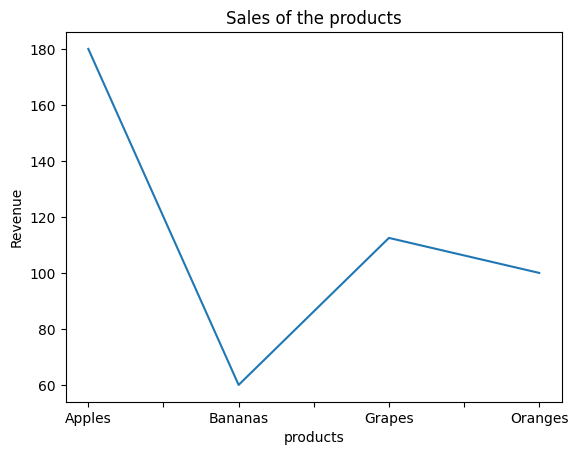

In [57]:
import matplotlib.pyplot as plt

grouped.plot()

plt.title("Sales of the products")
plt.xlabel("products")
plt.ylabel("Revenue")

plt.show()

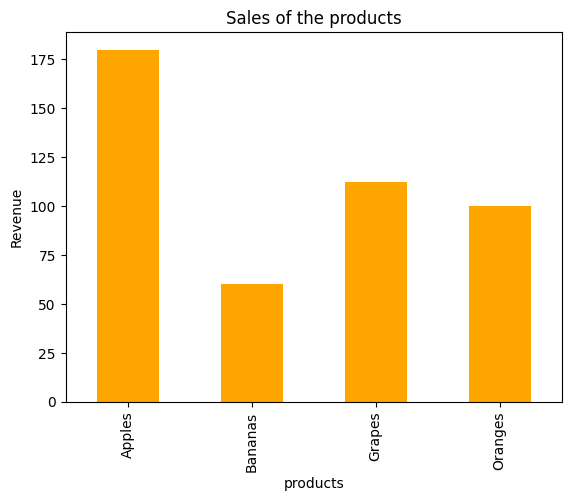

In [58]:
#bar graph
import matplotlib.pyplot as plt

grouped.plot(kind = "bar", color = "Orange")

plt.title("Sales of the products")
plt.xlabel("products")
plt.ylabel("Revenue")

plt.show()